In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq


In [2]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion-test-83118

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion-test-83118


In [3]:
files = os.listdir()
files

['F810bar-17500000.trc',
 'M32bar-125-00000.trc',
 'M12bar-175-00000.trc',
 'M45bar-17500000.trc',
 'M22bar-100-00000.trc']

In [4]:
m1X, m1Y, info = readTrc(files[0])
m2X, m2Y, info = readTrc(files[1])
m3X, m3Y, info = readTrc(files[2])
m4X, m4Y, info = readTrc(files[3])
m5X, m5Y, info = readTrc(files[4])

In [5]:
m1EB = 175/10
m2EB = 125/2
m3EB = 175/2
m4EB = 175/5
m5EB = 100/2

In [6]:
len(m1X)

100001

In [7]:
def cor(arry,low,up):
    aa = arry[low:up]
    bb = np.mean(aa)
    cc = arry-bb
    return cc

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


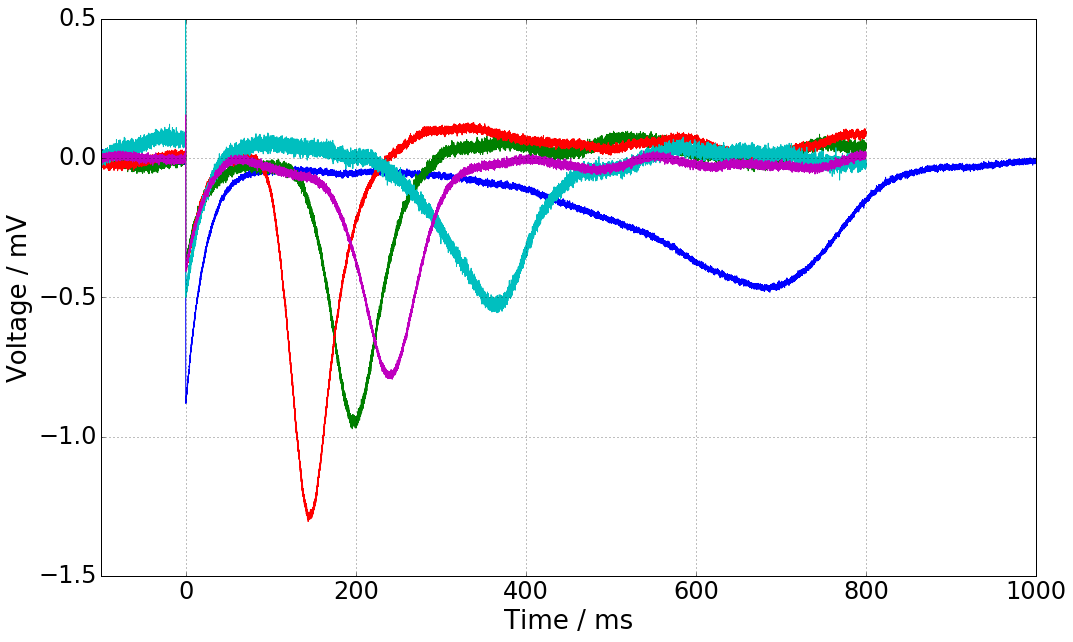

In [20]:
plt.figure(figsize=(15,9))
ml = 1e3

plt.plot(m1X*ml,cor(m1Y,0,20e3)*ml)
plt.plot(m2X*ml,cor(m2Y,0,20e3)*ml)
plt.plot(m3X*ml,cor(m3Y,0,20e3)*ml)
plt.plot(m4X*ml,cor(m4Y,0,20e3)*ml)
plt.plot(m5X*ml,cor(m5Y,0,20e3)*ml)

plt.xlim(-.1*ml,1*ml)
plt.ylim(-1.5,.5)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [9]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [13]:
MeanLoc = np.where(dataY==max(dataY))[0][0]
#Mean = dataX[MeanLoc]
MeanLoc

NameError: name 'dataY' is not defined

In [16]:
x = m1X[cut:]
y = cor(m1Y,0,20e3)[cut:]*ml
ah = np.where(y==min(y))
m1T = x[ah][0]

x = m2X[cut:]
y = cor(m2Y,0,20e3)[cut:]*ml
ah = np.where(y==min(y))
m2T = x[ah][0]

x = m3X[cut:]
y = cor(m3Y,0,20e3)[cut:]*ml
ah = np.where(y==min(y))
m3T = x[ah][0]

x = m4X[cut:]
y = cor(m4Y,0,20e3)[cut:]*ml
ah = np.where(y==min(y))
m4T = x[ah][0]

x = m5X[cut:]
y = cor(m5Y,0,20e3)[cut:]*ml
ah = np.where(y==min(y))
m5T = x[ah][0]

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib

In [ ]:
m5T

In [17]:
EB = [m1EB,m2EB,m3EB,m4EB,m5EB]
V  = [20/m1T,20/m2T,20/m3T,20/m4T,20/m5T]

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


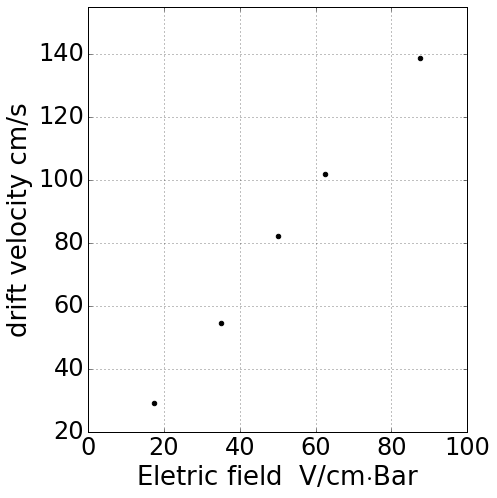

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(EB,V,color='k')

plt.xlim(0,100)
plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [22]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
def find_fit_vals(dataX,dataY):
    maxx = max(dataY)
    sig_val = maxx*0.5
    MeanLoc = np.where(dataY==max(dataY))[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    sigma_point = (Rpoint-Lpoint)/2   
    return (Mean,sigma_point)

In [15]:
cut = 30e3
#FitVals = []
x = m1X[cut:]
y = abs(cor(m1Y,0,20e3)[cut:])*ml
aa = find_fit_vals(x,y)
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), aa[0], aa[1]])
FitVals   = popt
FitVals

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'find_fit_vals' is not defined

In [42]:
m1X[40e3:]

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([ 0.40001998,  0.40003998,  0.40005998, ...,  1.59997995,
        1.59999995,  1.60001995])

In [41]:
m1Y[40e3:]

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([ 0.06081056,  0.06081195,  0.06081611, ...,  0.060938  ,
        0.06095299,  0.06094883])

In [44]:
min(cor(m1Y,0,20e3)[40e3:])

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


-0.0004819952521643231

In [ ]:
cut = 5000
FitVals = []
for q in range(0,len(paths)):
    x = Ftime[q][cut:]
    y = Fdata[q][cut:]
    aa = find_fit_vals(x,y)
    popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), aa[0], aa[1]])
    FitVals.append(popt)
FitVals = np.array(FitVals)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


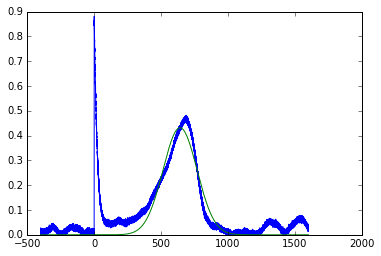

In [56]:
plt.plot(m1X*ml,abs(cor(m1Y,0,20e3)*ml))
plt.plot(m1X*ml,Gauss(m1X,*FitVals))


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


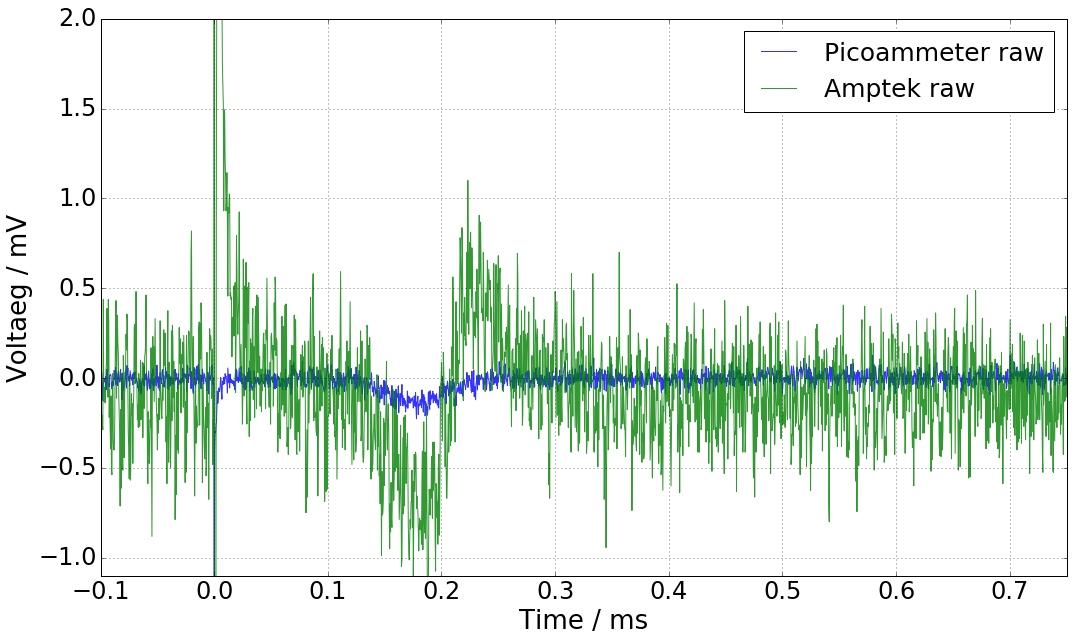

In [40]:
mu = 1e6
ml = 1e3
unit=  r"$\frac{V}{cm}$"
plt.figure(figsize=(15,9))
a=0
b=400
cor = np.mean(m2Y[0:10e3])
#plt.plot(m1X[a::b],m1Y[a::b],label='M1')
cor = np.mean(m2Y[0:10e3])
plt.plot(m2X[a::b],(m2Y[a::b]-cor)*ml,alpha=0.8,label='Picoammeter raw')
cor = np.mean(m3Y[0:10e3])
plt.plot(m3X[a::b],(m3Y[a::b]-cor)*ml,alpha=0.8,label='Amptek raw')
#plt.plot(m4X[a::b],m4Y[a::b],label='M4')


#plt.text(325, -10, r'750 Torr', fontsize=30)
#plt.text(25, 10, r'RC=10$\mu$s', fontsize=30)
#plt.title('BTX ION drift 5-24-17 ',fontsize=30)
plt.xlim(-.1,.75)
plt.ylim(-.0011*ml,.002*ml)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltaeg / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


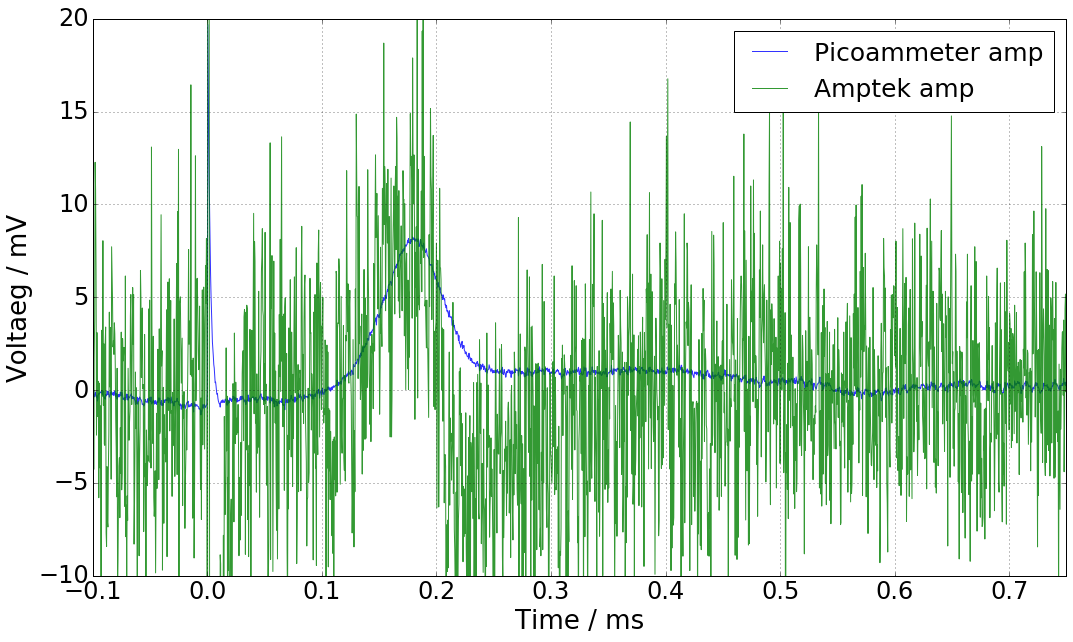

In [37]:
mu = 1e6
ml = 1e3
unit=  r"$\frac{V}{cm}$"
plt.figure(figsize=(15,9))
a=0
b=400
cor = np.mean(m1Y[0:10e3])
plt.plot(m1X[a::b],(m1Y[a::b]-cor)*ml,alpha=0.8,label='Picoammeter amp')
#cor = np.mean(m2Y[0:10e3])
#plt.plot(m2X[a::b],m2Y[a::b]-cor,label='M2')
#cor = np.mean(m3Y[0:10e3])
#plt.plot(m3X[a::b],m3Y[a::b]-cor,label='M3')
cor = np.mean(m4Y[0:10e3])
plt.plot(m4X[a::b],(m4Y[a::b]-cor)*ml,alpha=0.8,label='Amptek amp')

#plt.text(325, -10, r'750 Torr', fontsize=30)
#plt.text(25, 10, r'RC=10$\mu$s', fontsize=30)
#plt.title('BTX ION drift 5-24-17 ',fontsize=30)
plt.xlim(-.1,.75)
plt.ylim(-.01*ml,.02*ml)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltaeg / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


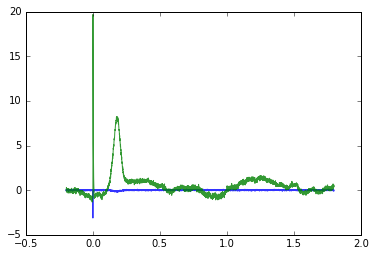

In [41]:
cor = np.mean(m2Y[0:10e3])
plt.plot(m2X[a::b],(m2Y[a::b]-cor)*ml,alpha=0.8,label='Picoammeter raw')

cor = np.mean(m1Y[0:10e3])
plt.plot(m1X[a::b],(m1Y[a::b]-cor)*ml,alpha=0.8,label='Picoammeter amp')


5001


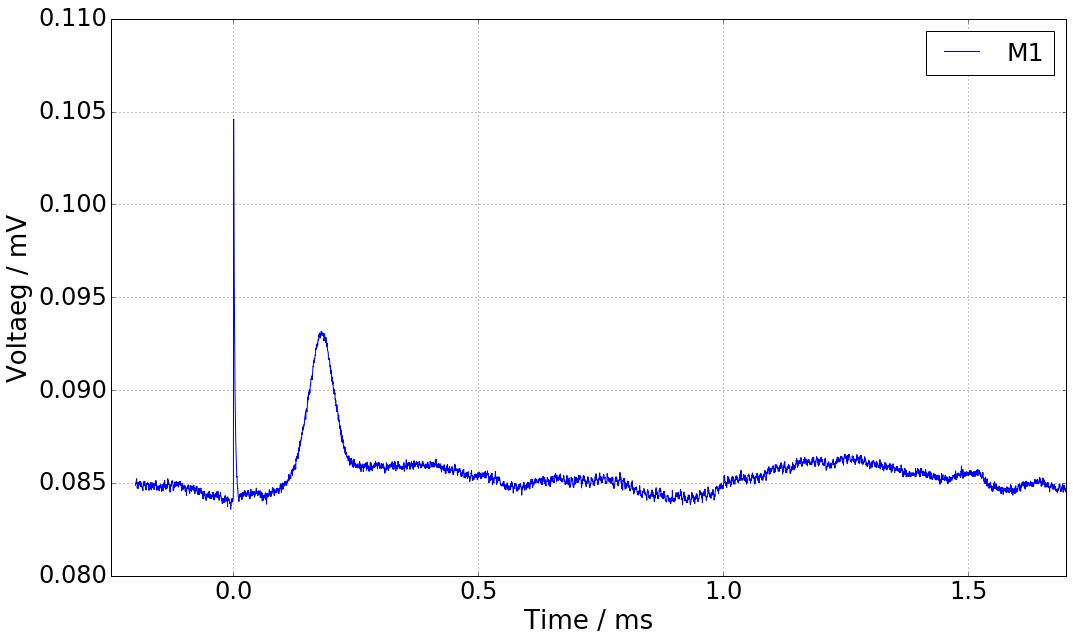

In [35]:
mu = 1e6
ml = 1e3
unit=  r"$\frac{V}{cm}$"
plt.figure(figsize=(15,9))
a=0
b=400
plt.plot(datX[a::b],datY[a::b],label='M1')

#plt.text(325, -10, r'750 Torr', fontsize=30)
#plt.text(25, 10, r'RC=10$\mu$s', fontsize=30)
#plt.title('BTX ION drift 5-24-17 ',fontsize=30)
plt.xlim(-.25,1.7)
plt.ylim(0.08,.11)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltaeg / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
print(len(datX[a::b]))
plt.show()


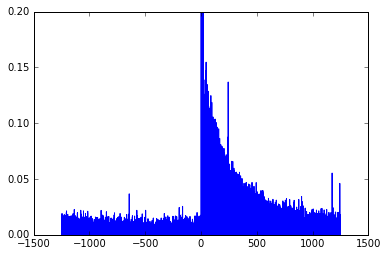

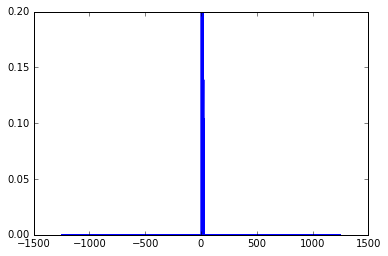

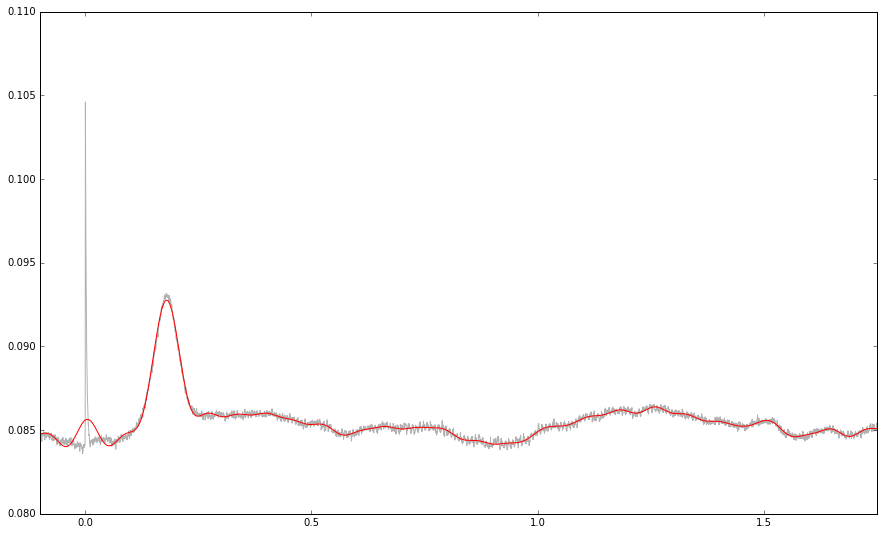

In [64]:
W = fftfreq(datY[a::b].size, d=datX[a::b][1]-datX[a::b][0])
f_signal = rfft(datY[a::b])

# If our original signal time was in seconds, this is now in Hz    
cut_f_signal = f_signal.copy()
cut_f_signal[(W<0)] = 0
cut_f_signal[(W>30)] = 0

cut_signal = irfft(cut_f_signal)


plt.plot(W,f_signal)
plt.ylim(0,.2)
#plt.xlim(-10,100)
plt.show()
plt.plot(W,cut_f_signal)
plt.ylim(0,0.2)
plt.show()

plt.figure(figsize=(15,9))
plt.plot(datX[a::b],datY[a::b],label='raw',color='k',alpha=0.3)
plt.plot(datX[a::b],cut_signal,label='cut',color='r')
plt.xlim(-.1,1.75)
plt.ylim(0.08,.11)
plt.show()